# ING Lion's Den 2024

## Team: RiskBusters

Michał Bryzik, Michał Niegierewicz, Kacper Gruca, Jan Ślusarek

In this notebook we analyze the target variable and possibility of client contagion. Finally we decided not to go with this solution.

In [2]:
import pandas as pd
df=pd.read_csv('../data/output/development_sample_cleaned_categorical.csv') 
df.head()

,ID,customer_id,Var1,Var4,Var5,Var6,Var7,Var15,Var16,Var23,...,income,loan_desc,Var8_q,Var25_q,Var26_q,Var20_1,Var21_1,Var22_1,Var17_1,working_months_1
0,11034977,32537148,1,2,9,1,0,0,0,1,...,1,3,10.0,3.0,0.0,1,1,1,3,2
1,11034978,32761663,1,3,9,1,0,4,4,0,...,0,1,0.0,3.0,1.0,0,0,0,0,5
2,11034979,32701063,2,0,2,1,0,0,0,2,...,5,5,10.0,3.0,0.0,1,1,1,5,9
3,11034980,32386786,3,3,5,6,9,0,0,0,...,2,2,0.0,1.0,4.0,0,0,0,1,9
4,11034982,32861919,1,2,6,1,0,1,1,2,...,0,4,10.0,0.0,10.0,0,1,1,0,4


<Axes: >

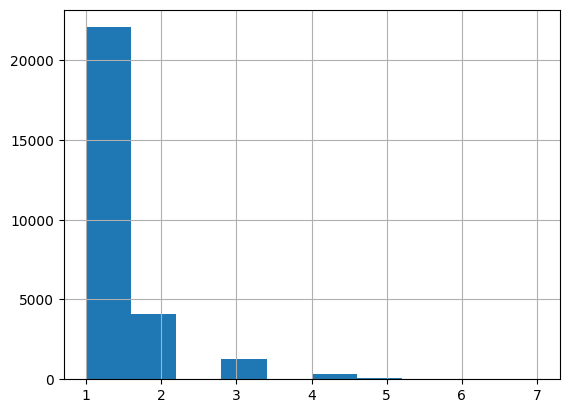

In [3]:
# Check if there are observarions that one client_id is assigned to more than one ID
num_of_exp = df['customer_id'].value_counts().sort_values(ascending=False)
num_of_exp.hist()

In [4]:
# Check  if there are observations that clients having more than one ID have different target values
df_check = df.groupby('customer_id').agg({'target': 'nunique'}).reset_index()
df_check = df_check.rename(columns={'target': 'unique_target_count'})
df_check['unique_target_count'].value_counts()

1    27387
2      395
Name: unique_target_count, dtype: int64

In [5]:
# Select client_id where there are more than one unique target values
client_ids = df_check[df_check['unique_target_count'] > 1]
client_ids

,customer_id,unique_target_count
78,32363042,2
206,32365991,2
286,32367333,2
321,32368005,2
353,32368670,2
...,...,...
27268,32884214,2
27440,32888115,2
27529,32889597,2
27688,32892665,2


In [9]:
# Join the selected client_id with the original dataframe by left join and order by customer_id
data_for_ids = client_ids.merge(df, on='customer_id', how='left')
data_for_ids = data_for_ids.sort_values('customer_id')

In [12]:
df.columns

Index(['ID', 'customer_id', 'Var1', 'Var4', 'Var5', 'Var6', 'Var7', 'Var15',
       'Var16', 'Var23', 'Var24', 'Var29', 'Var30', 'Var2', 'Var3', 'Var11',
       'Var12', 'Var14', 'target', 'Var27', 'Var28', 'income', 'loan_desc',
       'Var8_q', 'Var25_q', 'Var26_q', 'Var20_1', 'Var21_1', 'Var22_1',
       'Var17_1', 'working_months_1'],
      dtype='object')

In [14]:
df1 = data_for_ids[['customer_id', 'ID', 'target', 'working_months_1']]
df1

,customer_id,ID,target,working_months_1
0,32363042,11040603,0.0,2
1,32363042,11067217,1.0,8
2,32365991,11051638,0.0,1
3,32365991,11052194,0.0,0
4,32365991,11053851,1.0,9
...,...,...,...,...
1042,32889597,11058679,1.0,2
1043,32892665,11074146,1.0,2
1044,32892665,11074276,0.0,2
1045,32892709,11052188,0.0,1


In [15]:
data_for_ids['target'].value_counts()

0.0    647
1.0    400
Name: target, dtype: int64